In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import random
import os

In [2]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [3]:
filenames=os.listdir("F:/CATS vs DOGS/dogs-vs-cats/train")

categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)
        
df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})        

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization 

model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D (pool_size =(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [6]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop=EarlyStopping(patience=10)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_acc',patience=2,verbose=1,factor=0.5,min_lr=0.00001)
callbacks=[earlystop,learning_rate_reduction]

In [7]:
df['category']=df['category'].replace({0:'cat',1:'dog'})
train_df,validate_df=train_test_split(df,test_size=0.20,random_state=42)

train_df=train_df.reset_index(drop=True)
validate_df=validate_df.reset_index(drop=True)

total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15


In [8]:
train_datagen=ImageDataGenerator(rotation_range=15,
                                 rescale=1./255,
                                 shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)

train_generator=train_datagen.flow_from_dataframe(train_df,"F:/CATS vs DOGS/dogs-vs-cats/train/",
                                                 x_col='filename',y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size )

validation_datagen=ImageDataGenerator(rescale=1./255)
validation_generator=validation_datagen.flow_from_dataframe(validate_df,
                                                           'F:/CATS vs DOGS/dogs-vs-cats/train',
                                                           x_col='filename',
                                                           y_col='category',
                                                           target_size=Image_Size,
                                                           class_mode='categorical',
                                                           batch_size=batch_size)

test_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)

test_generator=train_datagen.flow_from_dataframe(train_df,"F:/CATS vs DOGS/dogs-vs-cats/train",
                                                x_col='filename',
                                                y_col='category',
                                                target_size=Image_Size,
                                                class_mode='categorical',
                                                batch_size=batch_size)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.
Found 20000 validated image filenames belonging to 2 classes.


In [9]:
epochs=10
history=model.fit_generator(train_generator,
                           epochs=epochs,
                           validation_data=validation_generator,
                           validation_steps=total_validate//batch_size,
                           steps_per_epoch=total_train//batch_size,
                           callbacks=callbacks)

C:\Users\Pruth\anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1333/1333 [==============================] - 677s 489ms/step - loss: 0.9767 - accuracy: 0.5934 - val_loss: 0.7490 - val_accuracy: 0.6707
Epoch 2/10
1333/1333 [==============================] - 177s 132ms/step - loss: 0.5886 - accuracy: 0.6982 - val_loss: 0.5188 - val_accuracy: 0.7397
Epoch 3/10
1333/1333 [==============================] - 94s 71ms/step - loss: 0.5310 - accuracy: 0.7407 - val_loss: 0.6357 - val_accuracy: 0.7161
Epoch 4/10
1333/1333 [==============================] - 98s 74ms/step - loss: 0.4831 - accuracy: 0.7738 - val_loss: 0.4366 - val_accuracy: 0.7982
Epoch 5/10
1333/1333 [==============================] - 98s 74ms/step - loss: 0.4693 - accuracy: 0.7846 - val_loss: 0.3990 - val_accuracy: 0.8190
Epoch 6/10
1333/1333 [==============================] - 96s 72ms/step - loss: 0.4290 - accuracy: 0.8044 - val_loss: 0.9074 - val_accuracy: 0.5692
Epoch 7/10
1333/1333 [==============================] - 97s 73ms/step - loss: 0.4249 - accuracy: 0.8081 - val_loss: 0.36

In [10]:
model.save('catsVSdogs_10epoch.h5')

In [11]:
test_filenames=os.listdir("F:/CATS vs DOGS/dogs-vs-cats/test1")
test_df=pd.DataFrame({'filename': test_filenames})
nb_samples=test_df.shape[0]

In [12]:
predict=model.predict_generator(test_generator,
                                steps=np.ceil(nb_samples/batch_size))

C:\Users\Pruth\anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\engine\training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [13]:
test_df['category']=np.argmax(predict,axis=-1)

label_map=dict((v,k)for k,v in train_generator.class_indices.items())
test_df['category']=test_df['category'].replace(label_map)

test_df['category']=test_df['category'].replace({'dog':1,'cat':0})

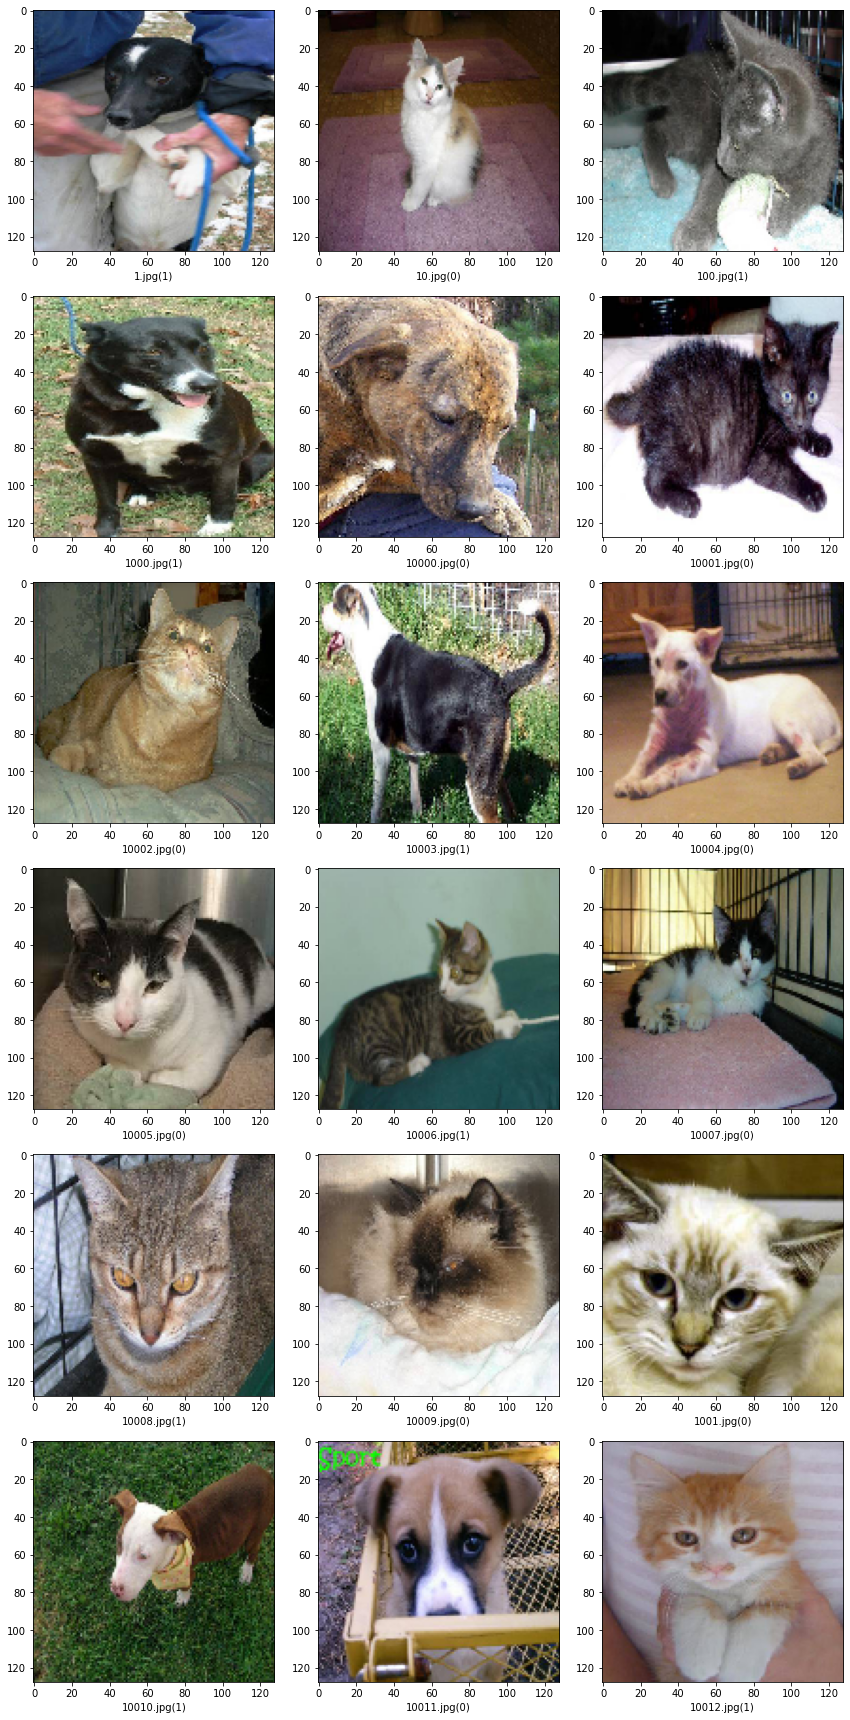

In [14]:
sample_test=test_df.head(18)
sample_test.head()
plt.figure(figsize=(12,24))
for index,row in sample_test.iterrows():
    filename=row['filename']
    category=row['category']
    img=load_img("F:/CATS vs DOGS/dogs-vs-cats/test1/"+filename,
                target_size=Image_Size)
    plt.subplot(6,3,index+1)
    plt.imshow(img)
    plt.xlabel(filename+'('+"{}".format(category)+')')
plt.tight_layout()
plt.show()

In [15]:
results={0:'cat',
        1:'dogs'}
from PIL import Image
import numpy as np
im=Image.open("C:/Users/Pruth/Downloads/12.jpg")
im=im.resize(Image_Size)
im=np.expand_dims(im,axis=0)
im=np.array(im)
im=im/255
pred=model.predict_classes([im])[0]
print(pred,results[pred])

C:\Users\Pruth\anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


1 dogs
